In [74]:
pip install sqlalchemy
!!pip install matplotlib

['Requirement already satisfied: matplotlib in c:\\programdata\\anaconda1\\lib\\site-packages (3.9.2)',
 'Requirement already satisfied: contourpy>=1.0.1 in c:\\programdata\\anaconda1\\lib\\site-packages (from matplotlib) (1.2.0)',
 'Requirement already satisfied: cycler>=0.10 in c:\\programdata\\anaconda1\\lib\\site-packages (from matplotlib) (0.11.0)',
 'Requirement already satisfied: fonttools>=4.22.0 in c:\\programdata\\anaconda1\\lib\\site-packages (from matplotlib) (4.51.0)',
 'Requirement already satisfied: kiwisolver>=1.3.1 in c:\\programdata\\anaconda1\\lib\\site-packages (from matplotlib) (1.4.4)',
 'Requirement already satisfied: numpy>=1.23 in c:\\programdata\\anaconda1\\lib\\site-packages (from matplotlib) (1.26.4)',
 'Requirement already satisfied: packaging>=20.0 in c:\\programdata\\anaconda1\\lib\\site-packages (from matplotlib) (24.1)',
 'Requirement already satisfied: pillow>=8 in c:\\programdata\\anaconda1\\lib\\site-packages (from matplotlib) (10.4.0)',
 'Requiremen

In [75]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import text
import matplotlib.pyplot as plt



In [76]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [77]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [78]:
engine = create_engine('sqlite:///:memory:')

In [79]:
produtos.to_sql('produtos',engine,index=False)


205

In [80]:
itens_pedidos.to_sql('itens_pedidos', engine, index=False)
pedidos.to_sql('pedidos', engine, index=False)
vendedores.to_sql('vendedores', engine, index=False)

5

In [81]:
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


In [82]:
query = 'SELECT CONDICAO FROM PRODUTOS'

In [83]:
with engine.connect() as conexao:
  consulta = conexao.execute(text(query))
  dados = consulta.fetchall()
pd.DataFrame(dados,columns=consulta.keys())

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [84]:
def sql_df(query):
    with engine.connect() as conexao:
      consulta = conexao.execute(text(query))
      dados = consulta.fetchall()
    return pd.DataFrame(dados,columns=consulta.keys())
    

In [85]:
query = '''SELECT CONDICAO, COUNT(*) AS 'Quantidade'
FROM PRODUTOS
GROUP BY CONDICAO;'''

df_produtos = sql_df(query)
df_produtos

,Condicao,Quantidade
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


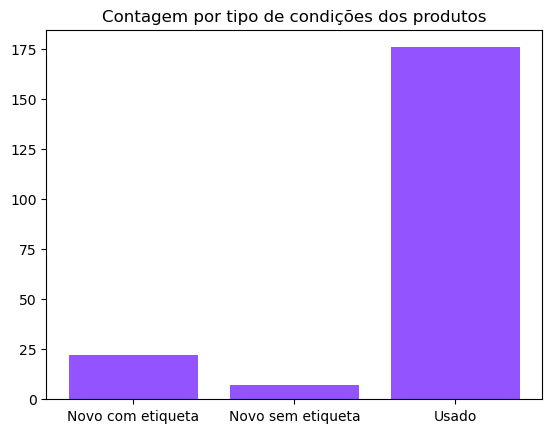

In [87]:
plt.bar(df_produtos['Condicao'],df_produtos['Quantidade'], color='#9353FF')
plt.title('Contagem por tipo de condições dos produtos')
plt.show()

In [88]:
sql_df ('SELECT * FROM PRODUTOS').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [89]:
sql_df ('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


## Relacionando as duas Tabelas

In [104]:
# Os códigos são os mesmos só retirei ITENS_PEDIDOS.PRODUTO_ID, 
    #query = '''SELECT  PRODUTOS.PRODUTO, SUM(ITENS_PEDIDOS.QUANTIDADE) AS 'Quantidade'
    #FROM ITENS_PEDIDOS, PRODUTOS
   #WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
    #GROUP BY PRODUTOS.PRODUTO'''
    
    #sql_df(query)

query = '''SELECT PRODUTOS.PRODUTO, SUM(ITENS_PEDIDOS.QUANTIDADE) AS 'Quantidade'
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY Quantidade ASC'''

df_prod_quant = sql_df(query)
df_prod_quant


,produto,Quantidade
0,Vestido Malha Estampa,318
1,Blusa Listrada Malha,322
2,Blusa Malha Azul,325
3,Blusa Babados Off-white,337
4,Blusa Cinza,341
...,...,...
196,Saia Midi Cinto,549
197,Calca Alfaiataria Preta,750
198,Saia Pregas Preta,751
199,Calca Jeans Costuras,755


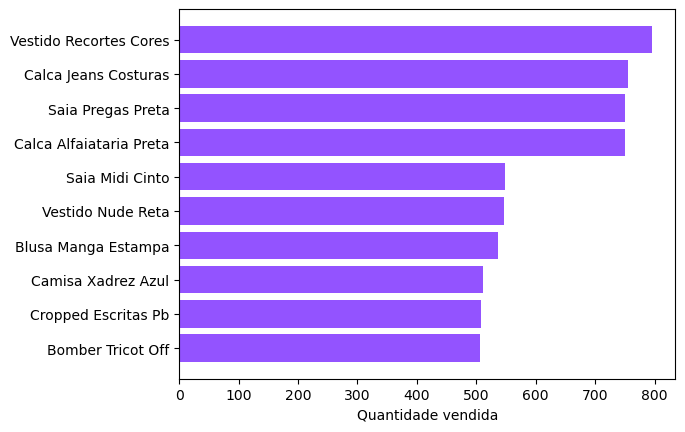

In [106]:
plt.barh(df_prod_quant['produto'][-10:], df_prod_quant['Quantidade'][-10:], color='#9353FF')
plt.xlabel('Quantidade vendida')
plt.show()

## Receita total das vendas de itens

# Os códigos são os mesmos
    #df_itens_pedidos = sql_df('SELECT VALOR_TOTAL FROM ITENS_PEDIDOS')
    #receita = df_itens_pedidos['valor_total'].sum()
    #receita

query = '''SELECT SUM(VALOR_TOTAL) AS RECEITA
FROM ITENS_PEDIDOS;
'''
df_itens_pedidos = sql_df(query)
df_itens_pedidos

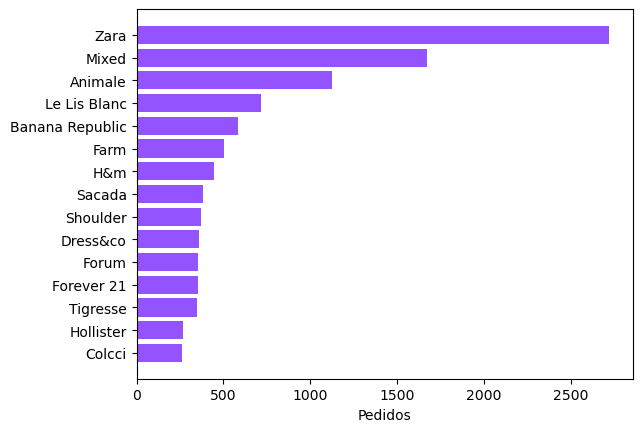

In [112]:
## 15 marcas mais pedidas
query = '''SELECT PRODUTOS.MARCA, COUNT (*) AS 'Pedidos'
FROM PRODUTOS, ITENS_PEDIDOS
WHERE PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID
GROUP BY PRODUTOS.MARCA
ORDER BY COUNT(*) ASC;
'''
df_marcas = sql_df(query)

plt.barh(df_marcas['marca'][-15:], df_marcas['Pedidos'][-15:], color = '#9353FF')
plt.xlabel('Pedidos')
plt.show()

In [114]:
sql_df('SELECT * FROM PEDIDOS').head(3)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600


In [115]:
sql_df('SELECT * FROM PEDIDOS').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


In [118]:
# Identificou a data
# Filtrando dados de 2020
query = '''SELECT *
FROM PEDIDOS
WHERE strftime('%Y',data_compra) = '2020';
'''
sql_df(query)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,112772,84743,3,2020-01-01,720
1,112909,56350,3,2020-01-01,1225
2,113068,70673,2,2020-01-01,1050
3,113453,16634,3,2020-01-01,2880
4,114487,43054,1,2020-01-01,640
...,...,...,...,...,...
14540,26762,9981,4,2020-12-31,8000
14541,27016,20029,3,2020-12-31,1764
14542,27666,12895,5,2020-12-31,10400
14543,28206,29893,4,2020-12-31,2100


In [121]:
# Agrupando por vendedor
query = '''SELECT VENDEDOR_ID, COUNT(*) AS quantidade
FROM PEDIDOS
WHERE strftime('%Y',data_compra) = '2020'
GROUP BY VENDEDOR_ID
'''
sql_df(query)

,vendedor_id,quantidade
0,1,3427
1,2,3338
2,3,2782
3,4,2510
4,5,2488


In [123]:
## Selecionar dados do ano de 2019
query = '''
SELECT strftime('%m', data_compra) AS mes, COUNT(*) AS quantidade_vendas
FROM pedidos
WHERE strftime('%Y', data_compra) = '2019'
GROUP BY mes;
'''
vendas_19 = sql_df(query)
vendas_19

## Selecionar dados do ano de 2020
query = '''
SELECT strftime('%m', data_compra) AS mes, COUNT(*) AS quantidade_vendas
FROM pedidos
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY mes;
'''
vendas_20 = sql_df(query)
vendas_20

,mes,quantidade_vendas
0,01,1271
1,02,1197
2,03,1280
3,04,1276
4,05,1206
5,06,896
6,07,984
7,08,1163
8,09,1221
9,10,1139


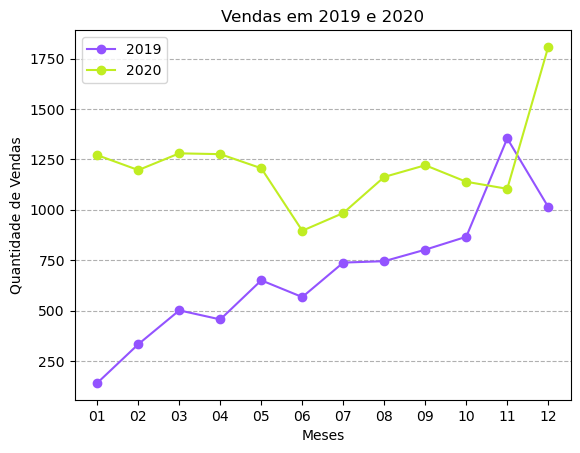

In [125]:
import matplotlib.pyplot as plt

# Plotar o gráfico de 2019 e 2020
plt.plot(vendas_19.mes.to_numpy(), vendas_19.quantidade_vendas.to_numpy(), marker='o', linestyle='-', color='#9353FF', label = '2019')
plt.plot(vendas_20.mes.to_numpy(), vendas_20.quantidade_vendas.to_numpy(), marker='o', linestyle='-', color='#C0ED22', label = '2020')

# Definir título e eixos
plt.title('Vendas em 2019 e 2020')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Vendas')

# Adicionar a legenda
plt.legend()

# Adicionar grid horizontal
plt.grid(axis='y', linestyle='--')

# Exibir a figura
plt.show()

In [127]:
query = '''SELECT VENDEDORES.NOME_VENDEDOR, COUNT(PEDIDOS.PEDIDO_ID) AS 'Quantidade vendas'
FROM PEDIDOS, VENDEDORES
WHERE strftime('%Y',data_compra) = '2020' AND VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
GROUP BY VENDEDORES.NOME_VENDEDOR
ORDER BY COUNT(PEDIDOS.PEDIDO_ID) DESC;
'''
sql_df(query)

,nome_vendedor,Quantidade vendas
0,Ana Duarte,3427
1,Daniel Siqueira,3338
2,Nadia Oliveira,2782
3,Millena Pereira,2510
4,Paulo Calanca,2488


## Analisando o valor médio por vendas

In [128]:
query = '''SELECT VENDEDORES.NOME_VENDEDOR, AVG(PEDIDOS.TOTAL) AS 'Valor médio por vendas'
FROM PEDIDOS, VENDEDORES
WHERE strftime('%Y',data_compra) = '2020' AND VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
GROUP BY VENDEDORES.NOME_VENDEDOR
ORDER BY AVG(PEDIDOS.TOTAL) DESC;
'''
sql_df(query)

,nome_vendedor,Valor médio por vendas
0,Daniel Siqueira,1972.338526
1,Millena Pereira,1894.614343
2,Ana Duarte,1843.452582
3,Nadia Oliveira,1818.342200
4,Paulo Calanca,1813.469855


## 10 produtos mais vendidos em 2019

In [132]:
query = '''SELECT PRODUTOS.PRODUTO, COUNT (PEDIDOS.PEDIDO_ID) AS TOTAL_PEDIDOS
FROM PEDIDOS, PRODUTOS
WHERE strftime('%Y', data_compra) = '2019' AND PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY TOTAL_PEDIDOS DESC
LIMIT 10;
'''
sql_df(query)

,produto,TOTAL_PEDIDOS
0,Vestido Recortes Cores,85
1,Calca Jeans Costuras,81
2,Saia Pregas Preta,73
3,Calca Alfaiataria Preta,66
4,Camisa Xadrez Azul,60
5,Bomber Tricot Off,56
6,Shorts Bordado Branco,55
7,Blusa Manga Estampa,54
8,Saia Midi Cinto,53
9,Saia Evase Cinza,53


## Distribuição da receita por mês em 2021

In [135]:
query = '''SELECT strftime('%m', data_compra) AS mes, SUM(total) AS receita
FROM pedidos
WHERE strftime('%Y', data_compra) = '2021'
GROUP BY mes;
'''
sql_df(query)

,mes,receita
0,01,2097109
1,02,1140729
2,03,51525


## Ranqueando as vendas

In [136]:
query = '''SELECT ESTADO, COUNT(*) AS Pedidos
FROM ITENS_PEDIDOS
GROUP BY ESTADO
ORDER BY Pedidos DESC;
'''
sql_df(query)

,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


In [149]:
# Unindo tabelas com JOIN

    #query = '''SELECT PEDIDOS.VENDEDOR_ID, COUNT(*) AS quantidade_vendas
    #FROM PEDIDOS
    #JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID
    #GROUP BY PEDIDOS.VENDEDOR_ID
    #ORDER BY quantidade_vendas DESC;
    #'''
    #sql_df(query)


# Buscando os vendedores que mais venderam noestado de SP

query = '''SELECT PEDIDOS.VENDEDOR_ID, COUNT(*) AS quantidade_vendas
FROM PEDIDOS
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PEDIDOS.VENDEDOR_ID
ORDER BY quantidade_vendas DESC;
'''
sql_df(query)

,vendedor_id,quantidade_vendas
0,2,190
1,5,182
2,3,181
3,1,180
4,4,157


## Adicionando a coluna de nomes

In [151]:
query = '''SELECT VENDEDORES.NOME_VENDEDOR, COUNT(*) AS quantidade_vendas
FROM PEDIDOS
JOIN VENDEDORES ON VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY VENDEDORES.NOME_VENDEDOR
ORDER BY quantidade_vendas DESC;
'''
sql_df(query)

,nome_vendedor,quantidade_vendas
0,Daniel Siqueira,190
1,Paulo Calanca,182
2,Nadia Oliveira,181
3,Ana Duarte,180
4,Millena Pereira,157


# Marcas em São Paulo por quantidade de pedidos

In [154]:
query = '''SELECT PRODUTOS.MARCA, COUNT(*) AS 'Produtos vendidos'
FROM PRODUTOS
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PRODUTOS.MARCA
ORDER BY COUNT(ITENS_PEDIDOS.PRODUTO_ID) DESC;
'''
df_marcas_sp = sql_df(query)
df_marcas_sp

,marca,Produtos vendidos
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
...,...,...
111,Topshop,1
112,Morena Rosa,1
113,Erre Erre,1
114,Bobô,1


## Produtos mais vendidos em dezembro no Brasil

In [155]:
query = '''SELECT PRODUTOS.PRODUTO, COUNT(*) AS quantidade_vendas
FROM ITENS_PEDIDOS
JOIN produtos ON produtos.produto_id = ITENS_PEDIDOS.produto_id
JOIN PEDIDOS ON PEDIDOS.PEDIDO_ID = ITENS_PEDIDOS.PEDIDO_ID
WHERE strftime('%m',PEDIDOS.data_compra)= '12'
GROUP BY produtos.produto
ORDER BY quantidade_vendas DESC;
'''
sql_df(query)

,produto,quantidade_vendas
0,Vestido Recortes Cores,30
1,Vestido Preto Franzido,26
2,Calca Jeans Costuras,26
3,Calca Alfaiataria Preta,26
4,Camisa Xadrez Azul,25
...,...,...
196,Sneaker Monograma Bege,6
197,Casaqueto Estampa Geometrica,6
198,Regata Renda Branca,5
199,Body Estampa Coracoes,5
